In [23]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator 
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

In [5]:
qc = QuantumCircuit(3)
qc.h([2,1,0])
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [7]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.x(1)
qc.draw()

┌───┐     
q_0: ─────┤ X ├─────
     ┌───┐└─┬─┘┌───┐
q_1: ┤ H ├──■──┤ X ├
     └───┘     └───┘

In [11]:
q = Statevector(qc)
q

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [13]:
counts_sv = q.sample_counts(100)
counts_sv

{'01': 50, '10': 50}

In [15]:
qc.measure_all()
qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■──┤ X ├─░──╫─┤M├
        └───┘     └───┘ ░  ║ └╥┘
meas: 2/═══════════════════╩══╩═
                           0  1

In [19]:
sim = BasicSimulator()

In [21]:
count_sim = sim.run(qc,shots = 100).result().get_counts()
count_sim

{'10': 53, '01': 47}

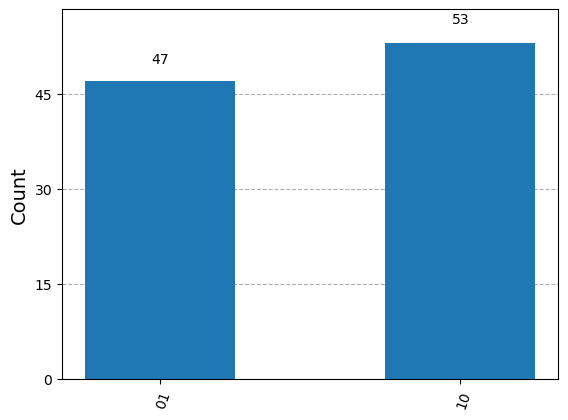

In [27]:
plot_histogram(count_sim)